Import the necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Load the Dataset

In [2]:
# Load the Dataset
df = pd.read_csv("dataset/Clean_Dataset.csv", index_col=0)


Display basic Information about the dataset

In [3]:
# Display basic information about the dataset
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Display the shape of the dataset
df.shape

(300153, 11)

In [5]:
# Display descriptive statistics of the dataset
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
# Display information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [7]:
# Display unique values in the 'airline' column
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [8]:
# Display the count of each unique value in the 'airline' column
df["airline"].value_counts()


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

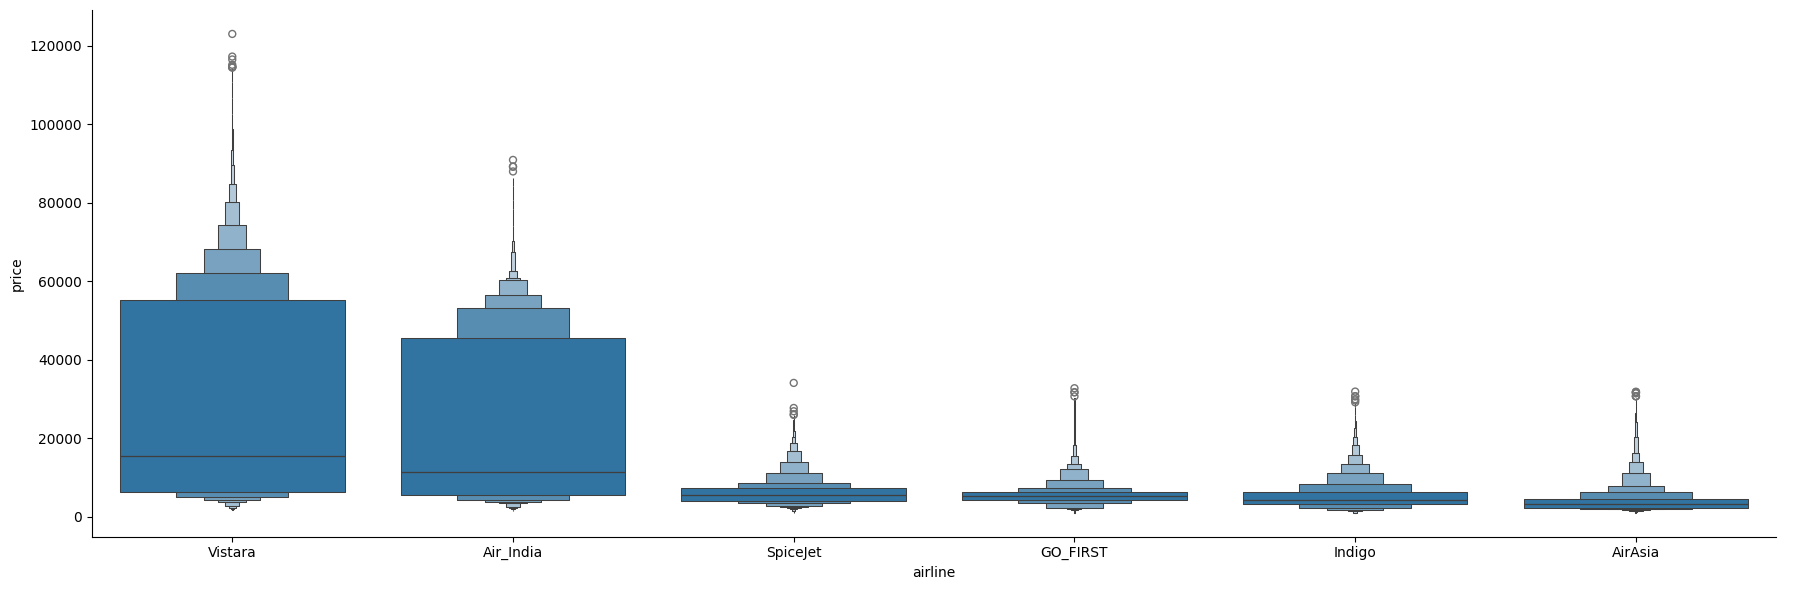

In [9]:
# Boxen plot for airline vs price
sns.catplot(y="price", x="airline", data=df.sort_values("price", ascending=False), kind="boxen", height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

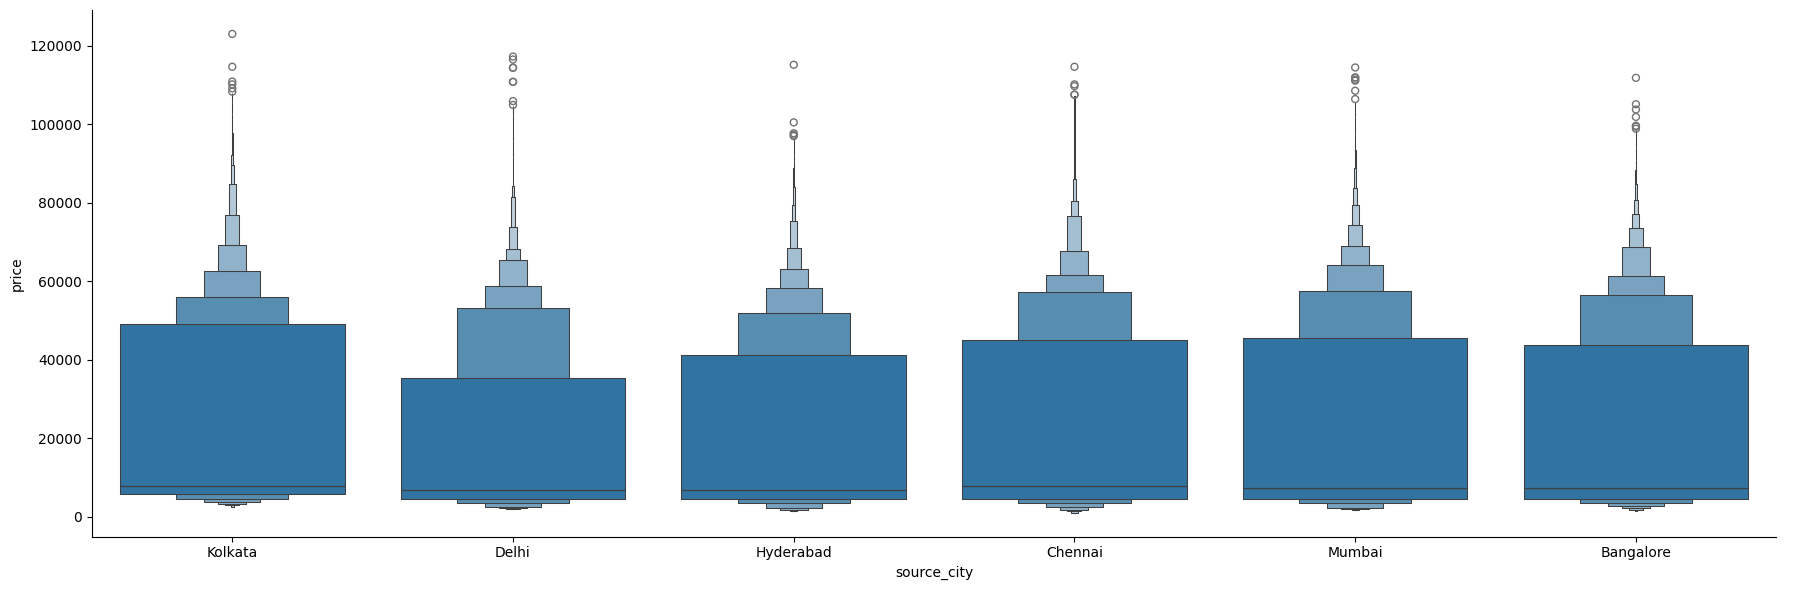

In [10]:
# Boxen plot for source_city vs price
sns.catplot(y="price", x="source_city", data=df.sort_values("price", ascending=False), kind="boxen", height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

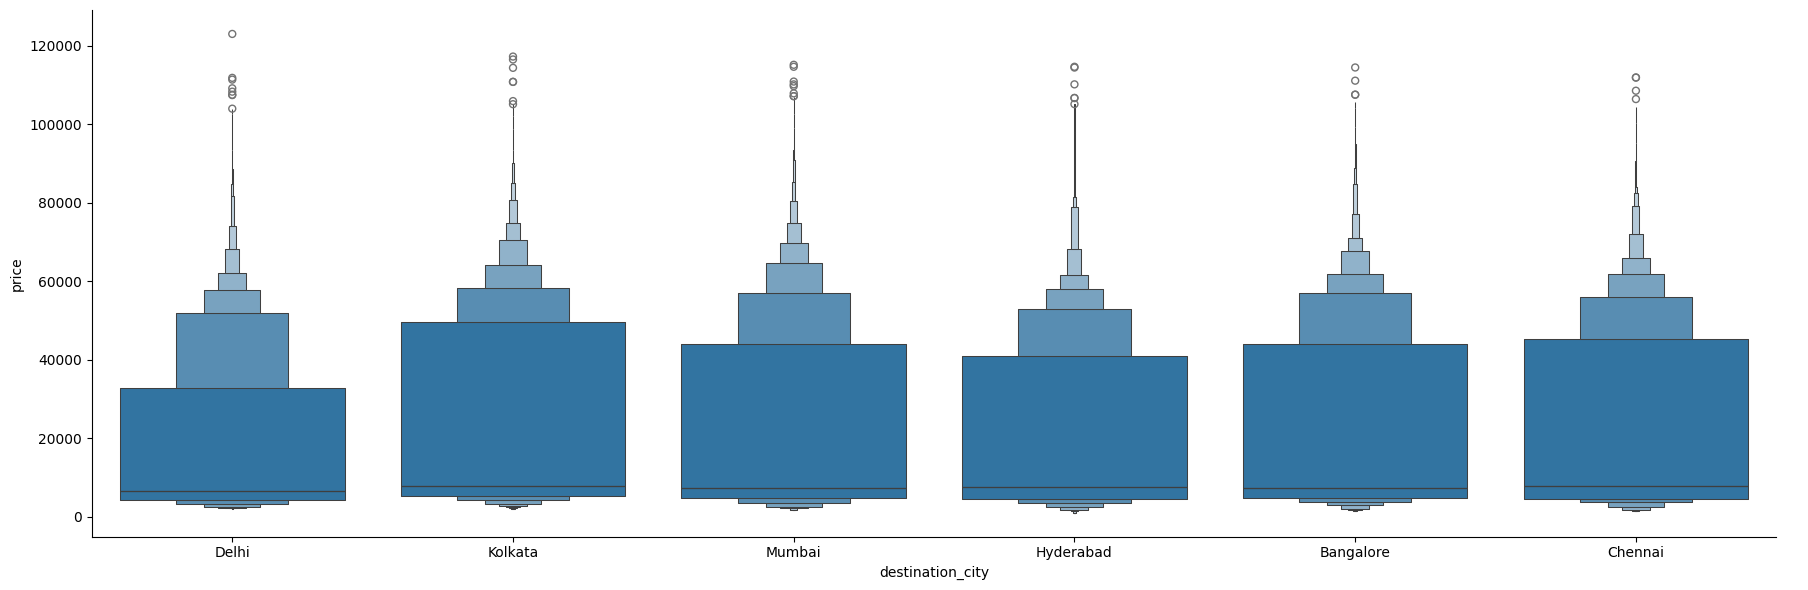

In [11]:
# Boxen plot for destination_city vs price
sns.catplot(y="price", x="destination_city", data=df.sort_values("price", ascending=False), kind="boxen", height=6, aspect=3)
plt.show

Feature Engineering

In [12]:
# Mapping for the 'stops' column
stop_mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}

# Map the 'stops' column to numerical values
df['stops'] = df['stops'].map(stop_mapping)

In [13]:
# Confirm unique values in the 'stops' column
print(df['stops'].unique())

[0 1 2]


In [14]:
# Convert the 'stops' column to integer type
df['stops'] = df['stops'].astype(int)

In [15]:
# Check data type conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(7)
memory usage: 26.3+ MB


In [17]:
# to split the duration into hours and minutes
df['duration_hour'] = df['duration'].astype(str).apply(lambda x: x.split('.')[0])
df['duration_minutes'] = df['duration'].astype(str).apply(lambda x: x.split('.')[1])

# Convert the new columns to numeric type
df['duration_hour'] = pd.to_numeric(df['duration_hour'])
df['duration_minutes'] = pd.to_numeric(df['duration_minutes'])

In [18]:
# Check data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  duration_hour     300153 non-null  int64  
 12  duration_minutes  300153 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 30.9+ MB


In [19]:
# Drop the initial 'duration' column
df = df.drop(columns=["duration"])

In [20]:
# Check the resulting DataFrame
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_hour,duration_minutes
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,1,5953,2,17
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,1,5953,2,33
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,1,5956,2,17
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,1,5955,2,25
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,1,5955,2,33


Evaluate the Flight Column

In [21]:
# Display unique values in the 'flight' column
df["flight"].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [22]:
# Display count of each unique value in the 'flight' column
df['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [23]:
# Drop the 'flight' column due to the high number of unique flights
# The 'flight' column contains a large number of unique flights,
# which could result in overfitting and may not contribute significantly to the model.
df = df.drop('flight', axis=1)

In [24]:
# Confirm that the 'flight' column has been dropped
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_hour,duration_minutes
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,1,5953,2,17
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,1,5953,2,33
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,1,5956,2,17
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,1,5955,2,25
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,1,5955,2,33


In [26]:
# Check for unique values in non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

for column in non_numeric_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique values in departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique values in arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique values in destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique values in class: ['Economy' 'Business']


In [28]:


label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ["airline", "source_city", "departure_time", "arrival_time", "destination_city", "class"]
df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))



In [31]:
# Display the updated DataFrame after label encoding
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_hour,duration_minutes
0,4,2,2,0,5,5,1,1,5953,2,17
1,4,2,1,0,4,5,1,1,5953,2,33
2,0,2,1,0,1,5,1,1,5956,2,17
3,5,2,4,0,0,5,1,1,5955,2,25
4,5,2,4,0,4,5,1,1,5955,2,33


In [32]:
# Display the updated DataFrame after label encoding
df.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_hour,duration_minutes
0,4,2,2,0,5,5,1,1,5953,2,17
1,4,2,1,0,4,5,1,1,5953,2,33
2,0,2,1,0,1,5,1,1,5956,2,17
3,5,2,4,0,0,5,1,1,5955,2,25
4,5,2,4,0,4,5,1,1,5955,2,33
